In [1]:
def decode_to_dic(s):
    temp=s.split("\n")
    temp=[x.split(",") for x in temp]
    dic={}
    for i in temp:
        try:
            dic[i[0]]=float(i[1])
        except:
            print(i,"error")
        
    return dic
def decode_txt(a):
    alist=a.split("\n>->")
    re_=[]
    for i in range(len(alist)):
        temp_word=alist[i].split("(*)")
        if (len(temp_word)>2):
            re_.append(singleword(temp_word))       
    #alist=[x.split("(*)") for x in alist]    
    return re_
class singleword:
    def __init__(self,L):
        self.word=L[0]
        self.id=L[1]
        self.type=L[2]
        self.pword=L[5]
        self.linktype=L[3]
        self.tag=[]
    def show(self):
        print(self.word,self.type,self.index,"  ",self.pword,self.linktype,self.tag)
    def setindex(self,p):
        self.index=p
def change_to_word(wL):
    return [singleword(wL[x]) for x in range(1,len(wL)) ]
def decode_article(a):
    re_article=[]
    re=a.split("<=sep=>")
    re=[x.split("<=set=>") for x in re]
    for i in re:
        temp=[]
        for j in i:
            temp.append(decode_txt(j))
        re_article.append(temp)
    return re_article
def get_str(needlist,spot1):
    temp=spot1.wordtype==needlist[0]
    for j in range(1,len(needlist)):
        temp=temp+(spot1.wordtype==needlist[j])
    return " ".join(spot1.word[temp])
def get_str_tf(needlist,spot1):
    temp=spot1.wordtype==needlist[0]
    for j in range(1,len(needlist)):
        temp=temp+(spot1.wordtype==needlist[j])
    return temp
def filter_ratio(mat,from_a=0,to_b=0):
        if(from_a>=to_b):
            return None
        else:
            narray=np.array(mat)
            narrayindoc=np.sum(np.heaviside(narray, 0),0 )
            narrayratio=narrayindoc/narray.shape[0]
            ntfa=from_a<narrayratio
            ntfb=narrayratio<=to_b
            ntf1=ntfa*ntfb
            return ntf1

def give_rank(dic,word,c=0):
    re_mat=[]
    for i in word:
        try:
            re_mat.append(dic[i])
        except:
            re_mat.append(0)
    return re_mat
def create_dic(needword,word,mat):
    needword=list(needword)
    word=list(word)
    dic={}
    for i in needword:
        dic[i]=mat[word.index(i)]
    return dic   
def create_list(needword,word,mat):
    needword=list(needword)
    word=list(word)
    
    relist=[]
    for i in needword:
        relist.append([i,mat[word.index(i)]])    
    return relist 
import itertools
class spot_tfidf:
    def __init__(self,tf_mat,word,title):
        self.mat=self.avgm(tf_mat)
        self.word=word
        self.title=title
    def get_mat(self,title_):
        for i in range(len(self.title)):
            if(title_ == self.title[i]):
                temp=i
                break
        return self.mat[i]
    def spword_tf(self,needlist,batch=2):
        temp=[self.get_mat(x) for x in needlist]
        temp=list(itertools.combinations(temp,batch))
        temp=np.sum(np.array([np.multiply.reduce(np.array(x)) for x in temp]),0)
        return temp    
    def avgm(self,m):                 #對x向除以sum
        s=(np.sum(m,1))
        m1=m/(s.reshape(s.shape[0],1)+0.000000001)
        return m1  
    def most_similar(self,mat):
        temp=self.mat*mat
        return np.sum(temp,1)
    def filter_ratio(self,from_a=0,to_b=0):
        if(from_a>=to_b):
            return None
        else:
            narray=np.array(self.mat)
            narrayindoc=np.sum(np.heaviside(narray, 0),0 )
            narrayratio=narrayindoc/narray.shape[0]
            ntfa=from_a<narrayratio
            ntfb=narrayratio<=to_b
            ntf1=ntfa*ntfb
            return ntf1   
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
class spot:
    def __init__(self,s):
        temp=decode_article(s)
        self.spot=[]
        for i in temp:
            if(len(i)>2):
                self.spot.append(i)
        self.wordtype=[]
        self.word=[]
        self.sentence=[]
        self.article=[]
        self.tags={}
        for art,arti in zip(self.spot,range(len(self.spot))):
            for sent,senti in zip(art,range(len(art))):
                for word in sent:
                    self.article.append(arti)
                    self.sentence.append(senti)
                    self.word.append(word.word)
                    self.wordtype.append(word.type)
        self.article=np.array(self.article)
        self.sentence=np.array(self.sentence)
        self.word=np.array(self.word)
        self.wordtype=np.array(self.wordtype)
    def show_all(self):
        for i in self.word:
            print(i,end="")
class look_into_article:
    def __init__(self,spot,article_=1):
        temp=spot.article==article_
        self.word=spot.word[temp]
        self.sentence=spot.sentence[temp]
    def show_article(self):
        print("".join(inspect_article.word))
    def set_article_rank(self,rank):
        if(len(rank)==len(self.word)):
            self.rank=np.array(rank)
        else:
            print("長度不合")

## 載入需要資料

In [28]:
with open ('D:/data/final_project/食記dic.csv',"r",encoding="utf8") as file:
    sfood=file.read()
with open ('D:/data/final_project/交通dic.csv',"r",encoding="utf8") as file:
    stravel=file.read()
with open ('D:/data/final_project/住宿dic.csv',"r",encoding="utf8") as file:
    shotel=file.read()


In [29]:
three_dict=[]
three_dict.append(decode_to_dic(sfood))
three_dict.append(decode_to_dic(stravel))
three_dict.append(decode_to_dic(shotel))

[''] error
[''] error
[''] error


In [4]:
txtlist=[]
import os,sys
dirs = os.listdir( "D:/data/final_project/article" )
print(dirs)

['AEON MALL OKINAWA RYCOM.txt', 'AEON北谷店 .txt', 'Ashibinaa Outlet .txt', 'BIC Camera難波店 .txt', 'BIOS之丘 .txt', 'Busena海中公園 .txt', 'Caretta汐留 .txt', 'DiverCity .txt', 'HEP FIVE摩天輪 .txt', 'JR TOWER T38展望室 .txt', 'Mild Seven之丘 .txt', 'ORION 啤酒名護工廠 .txt', 'OTS臨空豐崎營業所.txt', '一澤帆布 .txt', '三井Outlet Park大阪鶴見 .txt', '三井outlet 倉敷 .txt', '三十三間堂.txt', '三千院.txt', '三宮中心街 .txt', '三年坂.txt', '三角市場.txt', '三鷹之森吉卜力美術館 .txt', '上賀茂神社.txt', '上野 .txt', '上野動物園.txt', '上野恩賜公園.txt', '上野東照宮.txt', '上高地.txt', '下北澤 .txt', '下鴨神社.txt', '不忍池.txt', '世界大溫泉 .txt', '世豊商店.txt', '中之島 .txt', '中城公園.txt', '中島公園.txt', '中洲.txt', '中洲屋台.txt', '中禪寺湖 .txt', '主計町茶屋街.txt', '九州鐵道紀念館 .txt', '二年坂.txt', '二月堂.txt', '二木果子 .txt', '二条市場.txt', '二條城 .txt', '二荒山神社.txt', '五稜郭.txt', '井之頭恩賜公園.txt', '亞斗夢之丘 .txt', '交通.txt', '京都塔 .txt', '京都大學.txt', '京都御所.txt', '京都御苑.txt', '京都拉麵小路 .txt', '京都水族館.txt', '京都鐵道博物館 .txt', '仁和寺.txt', '今歸仁城跡.txt', '仙台朝市.txt', '仙巖園 .txt', '代代木公園 .txt', '代官山.txt', '仲見世通.txt', '伊勢神宮.txt', '伊達時代村.txt', '伏見稻荷大社.txt', '住宿.txt', '倉敷美觀地區

## 載入資料

In [25]:
spotlist=[]
dirs=dirs[0:100]
dirs=["黑門市場.txt","三年坂.txt","淺草.txt"]
for i in dirs:
    with open("D:/data/final_project/article/"+i,"r",encoding="utf8") as file:
        spotlist.append(spot(file.read()))

In [30]:
three_dict[0]["飯店"]

0.022865497979547494

# 過濾文章

In [33]:
inspect_article=look_into_article(spotlist[0],8)
article_rank=give_rank(three_dict[0],inspect_article.word)
article_rank_t=give_rank(three_dict[1],inspect_article.word)
article_rank_h=give_rank(three_dict[2],inspect_article.word)
inspect_article.set_article_rank(article_rank)
inspect_article.show_article()


、大阪黑門市場--適合回國前吃喝採購時間Thu、Mar、23、23:36:55、2017圖文版、http://licavona.pixnet.net/blog/post/44843584黑門市場有「大阪人的廚房」之稱但近幾年快變成台灣人和陸客的廚房了XD不過身為觀光客還是不免俗會想來這灶腳朝聖一下至少最大的優點是店家很早開門很適合最後一天搭飛機前無處可去的時候來打發時間XDD除了各種美食還有藥妝店、服飾店、雜貨店有一家賣褲襪的很便宜而且很多made、in、Japan大推薦！(忘了拍照orz)整個市場很大逛起來很舒服地理位置很方便搭地鐵到日本橋車站出來就是了如果住在道頓堀、心齋橋一帶走路10~15分鐘也可以到以下介紹幾間吃過買過感覺還不錯的店家~~黑門<U+6D5C>藤：知名的河豚料理老舖店內最便宜的套餐是5500日幣的「<U+6D5C>」有付出(前菜)、湯引(涼拌河豚皮)、<U+3066><U+3064><U+3055>(河豚生魚片)、<U+3066><U+3064><U+3061><U+308A>(河豚火鍋)、唐揚(炸河豚)、雜炊(河豚湯泡飯)等六道黑門三平：有多種新鮮魚貨以及供外帶的生魚片、握壽司現場也有座位供用餐採自助式要自己找座位人很多但翻桌率很快稍等一下就會有座位海鮮丼是很多觀光客的最愛味道跟名店當然有段差距但如果是想在市場嚐鮮還可以囉日進堂：據說號稱是大阪最好吃的天婦羅？XD主要是口味多元化現炸熱騰騰的金黃麵衣又酥又脆黑門中川超市：24小時營業的大型超市方便隨時來掃貨有多種生鮮、水果、冷凍食品、罐頭、調味料、飲料在這裡買了一些沖泡式飲品和調味料帶回台灣水果品質不錯價位也不貴我買了長野和山梨產的水蜜桃回飯店當宵夜甜又多汁還不錯喔！富士屋本店：有小朋友最愛的餅乾糖果也有咖啡果汁等瓶裝飲料還有速食品和調味包跟超商感覺很相近但物價更平易近人<U+3088><U+3057><U+3084>：非常大的零食專賣店固力果、明治、森永、樂天、不二家等知名廠牌通通都有門口有每日特價商品回國之前很適合來採購零食大包裝的KitKat或仙貝都很便宜喔！高橋食品：大正14年創業的豆腐專賣店以國產大豆全手工製作標榜健康飲料的豆漿一杯￥70天然不加糖豆香非常濃郁Green、Beans、Parlor、(<U+30B0><U+30EA><U+30FC><U+30F3><U+30D3><U+

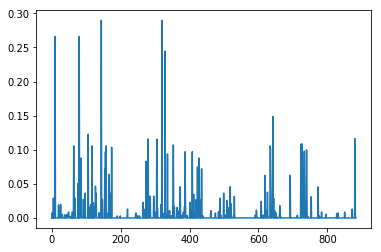

In [34]:
import matplotlib.pyplot as plt
plt.plot(list(range(len(article_rank))),article_rank)
plt.show()

In [35]:
rank_f=[0]
rank_t=[0]
rank_h=[0]


for i in range(1,inspect_article.sentence[-1]):
    #print(" ".join(inspect_article.word[inspect_article.sentence==i]))
    temp=np.array(article_rank)[inspect_article.sentence==i]
    rank_f.append(np.sum(temp)/(len(temp)+1))
    temp=np.array(article_rank_h)[inspect_article.sentence==i]
    rank_h.append(np.sum(temp)/(len(temp)+1))
    temp=np.array(article_rank_t)[inspect_article.sentence==i]
    rank_t.append(np.sum(temp)/(len(temp)+1))
    #print(rank[i])
print(sum(rank_f)/len(rank_f))
print(sum(rank_t)/len(rank_t))
print(sum(rank_h)/len(rank_h))
def get_blurry(mat):
    remat=mat
    for i in range(1,9):
        remat=remat+(np.roll(mat,i)+np.roll(mat,-i))*0.8**i
    return remat
def compare_two(m1,m2):
    temp=(m1-m2)
    return temp
    
rank_sp = get_blurry(compare_two(np.array(rank_f),0.5*(np.array(rank_t)+np.array(rank_h))))
avg_sp=sum(rank_f)/len(rank_f)*3-0.5*sum(rank_t)/len(rank_t)-0.5*sum(rank_h)/len(rank_h)

len_use=0
left=[]
for i in range(1,inspect_article.sentence[-1]):
    
    if(rank_sp[i]>avg_sp):
        print(" ".join(inspect_article.word[inspect_article.sentence==i]))
        
        len_use+=1
    else:
        left.append(" ".join(inspect_article.word[inspect_article.sentence==i]))
        print("=============",end="^")
    

0.006877505856583916
0.004144549527807512
0.004933837846957661
=============^=============^=============^=============^=============^還是 不 免俗 會 想來 這 灶腳 朝聖 一下
至少 最大 的 優點 是 店家 很早 開門
很 適合 最後 一天 搭 飛機 前 無處 可去 的 時候 來 打發 時間 XDD
除了 各種 美食
還有 藥妝店 、 服飾店 、 雜貨店
=============^=============^=============^=============^=============^=============^=============^=============^=============^=============^黑門<U + 6D5C>藤 ：
知名 的 河豚 料理 老舖
店 內 最 便宜 的 套餐 是 5500 日 幣 的 「 <U + 6 D 5 C > 」
有 付出 ( 前 菜 ) 、 湯引 ( 涼拌 河豚 皮 ) 、 < U + 3066 > < U + 3064 > < U + 3055 > ( 河豚 生魚片 ) 、
< U + 3066 > < U + 3064 > < U + 3061 >< U + 308 A> ( 河豚 火鍋 ) 、 唐揚 ( 炸 河豚 ) 、 雜炊 ( 河豚 湯泡飯 ) 等 六 道
黑門三平 ：
有 多種 新鮮 魚貨 以及 供 外帶 的 生魚片 、 握 壽司
現場 也 有 座位 供 用餐
採 自助式
要 自己 找 座位
人 很多 但 翻桌率 很快
稍等一下 就 會 有 座位
海鮮 丼 是 很多 觀光客 的 最 愛
味道 跟 名店 當然 有 段 差距
但 如果 是 想 在 市場 嚐鮮 還 可以 囉
日進堂 ：
據說 號稱 是 大阪 最 好吃 的 天婦羅 ？ XD
主要 是 口味 多元化
現炸 熱騰騰 的 金黃 麵衣
又 酥 又 脆
黑門 中川 超市 ：
24 小時 營業 的 大型超市
方便 隨時 來 掃貨
有 多種 生鮮 、 水果 、 冷凍 食品 、 罐頭 、 調味料 、 飲料
在 這裡 買了 一些 沖泡 式 飲品 和 調味料 帶回 台灣
水果 品質 不錯
============

過濾後剩: 
 55.00000000000001 %


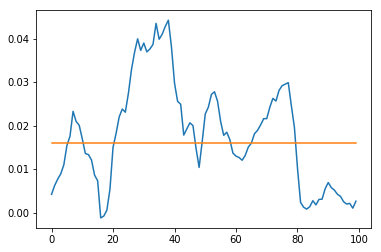


 ==================濾掉的========================= 

、 大阪 黑門市場 - - 適合 回國 前 吃喝 採購 時間 Thu 、 Mar 、 23 、 23:36:55 、 2017
圖文版 、 http://licavona.pixnet.net/blog/post / 44843584
黑門 市場 有 「 大阪人 的 廚房 」 之 稱
但 近幾年 快 變成 台灣 人 和 陸客 的 廚房 了 XD
不過 身為 觀光客
有 一家 賣 褲襪 的 很 便宜
而且 很多 made 、 in 、 Japan
大 推薦 ！ ( 忘了 拍照 orz )
整個 市場 很大
逛 起來 很 舒服
地理 位置 很 方便
搭地鐵 到 日本橋 車站 出來 就是 了
如果 住 在 道頓堀 、 心齋橋 一帶
走路 10 ~ 15 分鐘 也 可以 到
以下 介紹 幾 間 吃 過 買 過 感覺 還 不錯 的 店家 ~~
價位 也 不 貴
我 買了 長野 和 山梨 產 的 水蜜桃 回 飯店 當 宵夜
固力 果 、 明治 、 森永 、 樂天 、 不二 家 等 知名 廠牌 通通 都 有
門口 有 每日 特價 商品
回國 之前 很 適合 來 採購 零食
大包裝 的 KitKat 或 仙貝 都 很 便宜 喔 ！
高橋 食品 ：
大正 14年 創業 的 豆腐 專賣店
以 國產 大豆 全手工 製作
< Info>
交通 ： 地鐵 日本橋 <U + 99C5 > 10 號 出口
官網 ： https : / / www.kuromon.com/index.php
--
摩那卡 的 日本 玩樂 手札 、 、 http://licavona.pixnet.net/blog /
、、、、、、、、、、、、、、、、、、、、、、https : / / www.facebook . com/Japan.note /
、、 摩那卡 的 最 愛 甜點 是 <U + 3082 > < U + 306A> < U + 304B > ( monaka )
、、、、、、、、 最 難忘 景色 是 京都 的 楓 與 竹～
--
※ 、 發信站 : 、 批踢踢 實業坊 ( ptt.cc ) , 、 來自 : 、 111.254.104.205
※ 、 文章 網址 : 、 https : / / ww

In [36]:
print("過濾後剩: ",end="")
print("\n",len_use/len(rank_sp)*100,"%")
plt.plot(list(range(len(rank_sp))),rank_sp)
plt.plot(list(range(len(rank_sp))),avg_sp*np.ones(len(rank_sp)))
plt.plot()
plt.show()
print("\n ==================濾掉的========================= \n")
for i in left:
    print(i)

### 從特定景點 tfidf 得到要用的詞，再從整體的tfidf 獲得分數


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
tfidf_one_article_input=[]
three_dict=[]
for i in range(3):
    need_article=spotlist[i]
    for j in range(need_article.article[-1]):
        tfidf_one_article_input.append(" ".join(need_article.word[(need_article.article==j)*(get_str_tf(["a","n","nh","nf","nsf","v"],need_article))]))
    vectorizer1 =CountVectorizer()
    tfidf_article = vectorizer1.fit_transform(tfidf_one_article_input)
    articleword=np.array(vectorizer1.get_feature_names())
    tf_mat_article=tfidf_article.toarray()
    three_dict.append(create_dic(articleword[filter_ratio(tf_mat_article,0.01,1)],testword,tf_mat[i]))

NameError: name 'testword' is not defined

In [27]:
three_dict[0]

IndexError: list index out of range

In [80]:
temp_dic["藥妝"]

0.03544778529881435

### 類似景點 tfidf 類似程度

## 整體tfidf

In [100]:
tfidf_input=[]
for i ,j in zip(spotlist,range(len(spotlist))):
    try:
        tfidf_input.append(get_str(["a","n","nh","nf","nsf","v"],i))
    except:
        tfidf_input.append("ng ng ng")
        print(dirs[j])
vectorizer = TfidfVectorizer()     
tfidf = vectorizer.fit_transform(tfidf_input)
testword=np.array(vectorizer.get_feature_names())
tf_mat=tfidf.toarray()

In [101]:
print((np.argsort(tf_mat[1])))
print(type(testword))


[18703  8172  8173 ...  9417  4340  6914]
<class 'numpy.ndarray'>


In [21]:
def show_top_word(tf,top_n,testword_):
    _testword_=np.array(testword_)
    print(_testword_[np.flip(np.argsort(tf),0)][0:top_n])
show_top_word(tf_mat[1],200,testword)

NameError: name 'tf_mat' is not defined

__[blog_排組](https://www.cnblogs.com/alexkh/archive/2013/03/20/2971533.html)__

In [29]:
test=spot_tfidf(tf_mat,testword,dirs)
need_=test.filter_ratio(0.01,1)
test.mat=test.mat[:,need_]
test.word=test.word[need_]

In [35]:
test.mat.shape

(505, 16877)

In [37]:

"""import pandas as pd 
df = pd.DataFrame(test.mat)
df.to_csv("D:/data/final_project/mat.csv",header=None,index=False)
df = pd.DataFrame(test.word)
df.to_csv("D:/data/final_project/word.csv",header=None,index=False)
df = pd.DataFrame(np.array(dirs))
df.to_csv("D:/data/final_project/spot.csv",header=None,index=False)"""

In [31]:
show_top_word(test.most_similar(test.spword_tf(["世豊商店.txt","合羽橋道具街 .txt","巢鴨地藏通商店街 .txt"])),30,dirs)

['千日前道具屋筋商店街.txt' '京都御苑.txt' '大須觀音.txt' '合羽橋道具街 .txt' '水鏡天滿宮 .txt'
 '心齋橋筋商店街.txt' '新京極商店街.txt' '東京站一番街 .txt' '天神橋筋商店街.txt' '戎橋.txt'
 '神戶港塔 .txt' '巢鴨地藏通商店街 .txt' '橫濱元町商店街.txt' '大須商店街.txt' '吉祥寺.txt'
 '大阪生活今昔館 .txt' '原宿.txt' '三宮中心街 .txt' '阿美橫丁 .txt' '輕井澤王子outlet .txt'
 '臨空城Outlet .txt' '增上寺 .txt' '狸小路.txt' '免稅店DFS.txt' '道頓堀水上觀光船.txt'
 '仲見世通.txt' '常寂光寺.txt' '四條河原町.txt' '御殿場 Premium Outlet .txt' '阿蘇神社.txt']


In [32]:
show_top_word(test.most_similar(test.spword_tf(["根津神社.txt","北海道神宮.txt","上賀茂神社.txt","八坂神社.txt","出雲大社.txt"],batch=4)),30,dirs)

['川越冰川神社 .txt' '靖國神社 .txt' '上賀茂神社.txt' '下鴨神社.txt' '八坂神社.txt' '根津神社.txt'
 '嚴島神社 .txt' '平野神社.txt' '神樂坂.txt' '宮島.txt' '淺草神社 .txt' '櫛田神社.txt'
 '晴明神社.txt' '冰室神社 .txt' '千本鳥居.txt' '地主神社.txt' '伏見稻荷大社.txt' '千鳥之淵 .txt'
 '波上宮.txt' '水前寺成趣園.txt' '出雲大社.txt' '高千穗峽 .txt' '鬼之洗濯板 .txt' '江之島 .txt'
 '貴船神社.txt' '清水寺.txt' '野宮神社.txt' '祇園.txt' '圓山公園 .txt' '難波八阪神社.txt']


In [33]:
show_top_word(test.most_similar(test.spword_tf(["層雲峽 .txt","十和田湖.txt","嵐山.txt","摩周湖.txt"],batch=2)),30,dirs)

['華嚴瀑布 .txt' '層雲峽 .txt' '中禪寺湖 .txt' '十和田湖.txt' '白絲瀑布 .txt' '奧入瀨溪 .txt'
 '京都御苑.txt' '草津溫泉 .txt' '水鏡天滿宮 .txt' '常寂光寺.txt' '白鬚瀑布 .txt' '銀山溫泉 .txt'
 '八甲田山.txt' '知床五湖.txt' '高千穗峽 .txt' '永觀堂.txt' '霧島神宮.txt' '道後溫泉 .txt'
 '御殿場 Premium Outlet .txt' '定山溪 .txt' '別府地獄.txt' '河口湖.txt' '金閣寺.txt'
 '摩周湖.txt' '高尾山.txt' '嵐山.txt' '二荒山神社.txt' '青池 .txt' '雪之大谷 .txt' '上高地.txt']


In [135]:
"""with open("./data/newword.txt","r",encoding="utf8") as file:
    temps=file.read()
    temps=temps.replace("\t"," ")
    temps=temps.replace("  "," ")
    addlist=temps.split("\n")
#addlist=["道敦堀 nsf"]#自定新词
spot=[]
for i in addlist:    
    k=i.split(" ")
    spot.append(k[0])
spot"""

'with open("./data/newword.txt","r",encoding="utf8") as file:\n    temps=file.read()\n    temps=temps.replace("\t"," ")\n    temps=temps.replace("  "," ")\n    addlist=temps.split("\n")\n#addlist=["道敦堀 nsf"]#自定新词\nspot=[]\nfor i in addlist:    \n    k=i.split(" ")\n    spot.append(k[0])\nspot'

In [136]:
l=1
name="a"
newtxtlist=[]
for i in range(1,l+1):
    with open("./data/article/"+str(name)+" ("+str(i)+").txt","r",encoding="utf8") as file:
        newtxtlist.append(decode_txt(file.read()))

In [137]:
class singleword:
    def __init__(self,L):
        self.word=L[0]
        self.id=L[1]
        self.type=L[2]
        self.pword=L[5]
        self.linktype=L[3]
        self.tag=[]
    def show(self):
        print(self.word,self.type,self.index,"  ",self.pword,self.linktype,self.tag)
    def setindex(self,p):
        self.index=p

In [138]:
newtxtlist

[[<__main__.singleword at 0x1d4e54a8860>,
  ...]]

In [139]:
# input
from sklearn.feature_extraction.text import CountVectorizer
def counter(word,by=0):
    vectorizer = CountVectorizer(ngram_range=(1, 1), lowercase=False, token_pattern = r'\b\w+\b', min_df = 1)
    if(by==0):
        word=[" ".join(x.split("")) for x in word]
        tf_mat = vectorizer.fit_transform(word)
    else:
        temp=[]
        for i in word:
            s=""
            for x in i:
                if (x.type in by):
                    s=s+","+x.word
                    x.show()
            temp.append(s)
        tf_mat = vectorizer.fit_transform(temp)
    return (vectorizer.get_feature_names(),tf_mat.toarray())


In [140]:
t=counter([b.content],by=["n","nsf"])

NameError: name 'b' is not defined

In [ ]:
t[1]

In [ ]:
class article_first_layer:
    def __init__(self,wordveclist,d="article"):
        self.wordveclist=wordveclist
        self.page=0
        self.wordvec=wordveclist[self.page]
        self.indexlen=len(self.wordvec)-1
        self.point=0
        self.dtype=d
    def nextpage(self):
        if(self.page<len(self.wordveclist)-1):
            page+=1
            self.wordvec=wordveclist[self.page]
            self.point=0
            return True
        else:
            return False
    def to_standard_type(self):
        
        return [singleword([0,0,0,0,0,0,0])]+[singleword(self.wordvec[i]) for i in range(1,len(self.wordvec))]
    """
    def action(self,x=[False]):
        if(x[0]=="W"):
            return (self.wordvec[x[1]][0])
        elif(x[0]=="T"):
            return (self.wordvec[x[1]][2])
        elif(x[0]=="C"):
            return (self.wordvec[x[1]][0],self.wordvec[x[1]][3],self.wordvec[x[1]][4])
        elif(x[0]=="N"):
            if(self.point<self.indexlen):
                self.point+=1
                return point
            else:
                return False    
        elif(x[0]=="B"):
            if(self.point<self.indexlen):
                self.point+=1
                return point
            else:
                return False
        else:
            print("somewhere got wrong")
            """

In [ ]:
class article_second_layer_sentence:
    def read_sentence(self,pointer):
        p=pointer
        re=[]
        while(True):]
            if(p<=1 or p>=self.contentlen): 
                break
            elif(self.sp_type(p)!=1):
                p-=1
            else:
                p+=1
                break
        while(True):
            if(p>=self.contentlen):
                p=-1
                print("out of range")
                break
            elif(self.sp_type(p)!=1):
                re.append(self.content[p])
            else:
                break
            p+=1
        return (re,p)
    def sp_type(self,wordp):
        word=self.content[wordp]
        
        if(word.word=="," or word.word=="。" or word.word=="，"):
            return 1
        else:
            return 0

In [ ]:
class article_second_layer(article_second_layer_sentence):
    def __init__(self,firstlayer):
        self.content=firstlayer.to_standard_type()
        self.contentlen=len(self.content)
        #self.content=article_first_layer(newtxtlist)
    def show_sentence(self,s):
        print([x.word for x in s[0]])
    def wordlink(self,link=["ns","n","nsf "]):
        
        
        


In [ ]:
a=article_first_layer(newtxtlist)
b=article_second_layer(a)

In [ ]:
b.show_sentence(b.read_sentence(7890))

In [ ]:
for i in range(len(b.content)):
    print(i,end=" ")
    b.content[i].show()

In [ ]:
for i in b.content:
    if(i.word in spot or i.type=="nsf" or i.type== "ns"):
        print(i.word)
    